In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
from matplotlib import pyplot as plt
from datetime import datetime   

<h1> Extraccion de datos a partir de Yahoo Finances </h1>

In [8]:
#Buscamos datos de SP500 y MELI

#Fechas de inicio y fin
start_data = '2022-01-01'



end_data = str(datetime.now().year) + "-" + str(datetime.now().month) + "-" + str(datetime.now().day)

lista_etiquetas = ["MELI","AAPL","AMZN","KO","GOOG"]

#Accion en cuestion
etiqueta_1 = "MELI"
etiqueta_2 = "AAPL"
etiqueta_3 = "AMZN"
etiqueta_4 = "KO"
etiqueta_5 = "GOOG"

data_sp500 = yf.download("^GSPC",start=start_data,end=end_data, interval = "1wk") #--> SP500
data_accion1 = yf.download(etiqueta_1,start=start_data,end=end_data, interval = "1wk")
data_accion2 = yf.download(etiqueta_2,start=start_data,end=end_data, interval = "1wk")
data_accion3 = yf.download(etiqueta_3,start=start_data,end=end_data, interval = "1wk")
data_accion4 = yf.download(etiqueta_4,start=start_data,end=end_data, interval = "1wk")
data_accion5 = yf.download(etiqueta_5,start=start_data,end=end_data, interval = "1wk")




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


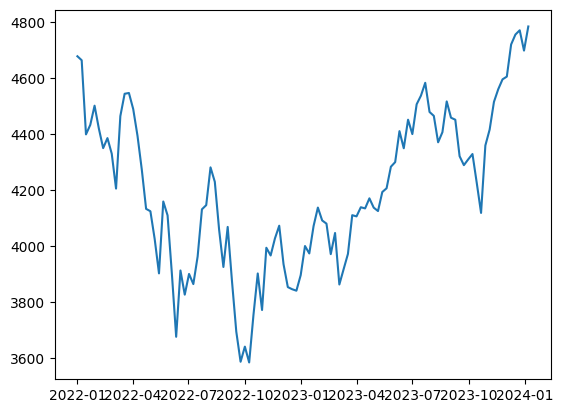

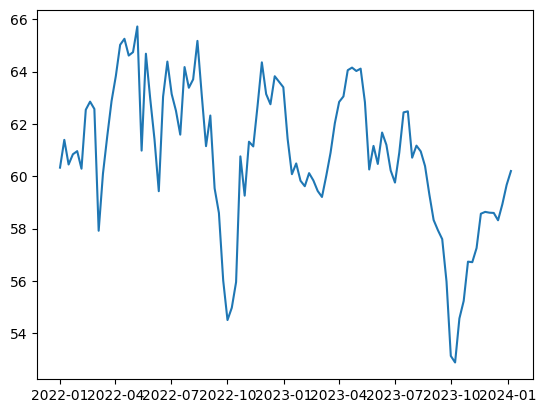

In [9]:

plt.plot(data_sp500['Close'])
plt.show()
#plt.plot(data_accion1['Close'])
#plt.plot(data_accion2['Close'])
#plt.plot(data_accion3['Close'])
plt.plot(data_accion4['Close'])
plt.show()

#plt.plot(data_accion5['Close'])


<h1> Estudio de Correlaccion y Covarianza </h1>

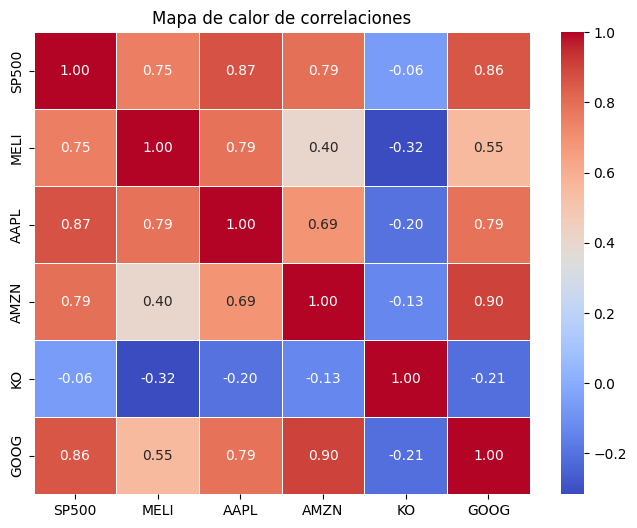

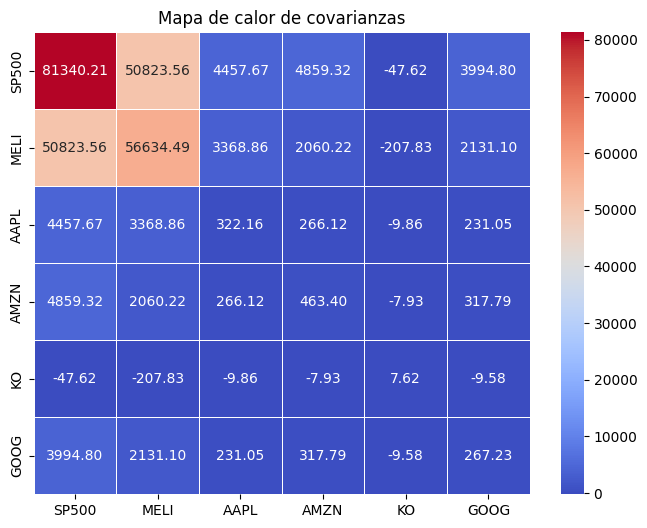

In [10]:
#Concatenacion de datos
datos_concatenados = pd.DataFrame()
datos_concatenados['SP500'] = data_sp500['Close']
datos_concatenados[lista_etiquetas[0]] = data_accion1['Close']
datos_concatenados[lista_etiquetas[1]] = data_accion2['Close']
datos_concatenados[lista_etiquetas[2]] = data_accion3['Close']
datos_concatenados[lista_etiquetas[3]] = data_accion4['Close']
datos_concatenados[lista_etiquetas[4]] = data_accion5['Close']
datos_concatenados = datos_concatenados.reset_index(drop=True)

# Calcular la matriz de correlación
correlation_matrix = datos_concatenados.corr(method='pearson')

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de calor de correlaciones')
plt.show()


# Calcular la matriz de covarianza
covarianza_matrix = datos_concatenados.cov()

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(covarianza_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de calor de covarianzas')
plt.show()


<h1> Similitud del Coseno </h1>

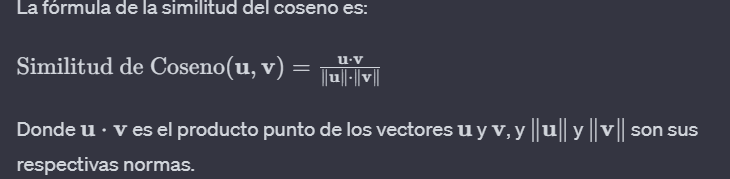

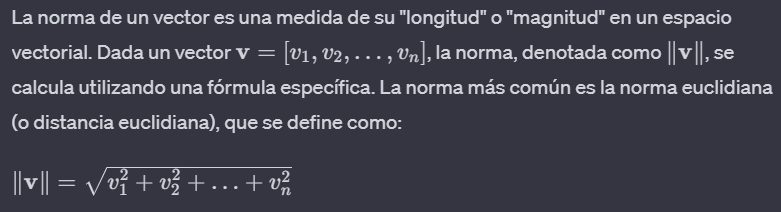

In [11]:
#=== Prueba del Coseno entre MELI y el SP500
producto_punto = np.dot(data_sp500['Close'],data_accion1['Close'])

# Calcular las normas de los vectores
norma_sp500 = np.linalg.norm(data_sp500['Close'])
norma_meli = np.linalg.norm(data_accion1['Close'])
# Calcular la similitud de coseno
similitud_coseno = producto_punto / (norma_sp500 * norma_meli)
print("La similitud del coseno entre MELI y SP500 es: ",similitud_coseno)


#=== Prueba del Coseno entre KO y MELI
producto_punto_ko = np.dot(data_sp500['Close'],data_accion4['Close'])
# Calcular las normas de los vectores
norma_ko = np.linalg.norm(data_accion4['Close'])
similitud_coseno_ko = producto_punto_ko / (norma_ko * norma_sp500)
print("La similitud del coseno entre KO y SP500 es: ",similitud_coseno_ko)


La similitud del coseno entre MELI y SP500 es:  0.9862215630438871
La similitud del coseno entre KO y SP500 es:  0.996524955308636
